## Before we Begin:
If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth reserach towards further datasets and produce more accurate models

# 1. Introduction
To become more profitable, you need to be able to differentiate your customers to more effectively satisfy the needs of the **different segments**. But how do you segment your customers ? The answer lies in this notebook !

Even if you have a highly-targeted customer demographic in your business, there are still variations between individual customers. Recognising these differences will allow you to tailor your approach to the needs of varying customer segments and allow you to effectively serve a wider group of people.

## What is Customer Segmentation?
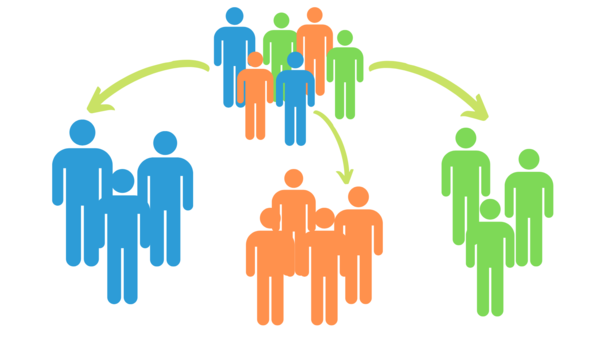
Customer segmentation is the practice of **dividing a customer base into groups of individuals that are similar in specific ways**. You can provide different value propositions to different customer groups. Customer segments are usually **determined on similarities**, such as personal characteristics, preferences or behaviours that should correlate with the same behaviours that drive customer profitability.

A customer segmentation model allows for the** effective allocation of marketing resources** and the maximisation of cross and up-selling opportunities. When a group of customers is sent an email that is specific to their needs, it’s easier for companies to send those customers special offers.

Other benefits of customer segmentation include staying a step ahead of the competition and identifying new products that existing or potential customers could be interested in.

Credits: https://www.visma.com/blog/customer-segmentation-important/

# 2.Kernel Goals
There are three primary goals of this kernel.

1. Do a **exploratory analysis** of the mall customer segmentation dataset
2. Do an **visualization analysis **of the mall customer segmentation dataset
3. **Segmentation**: What are the segment which lies within the customer data and how are we going to treat them ?

# 3. Importing libraries and exploring Data
## 3a.Importing Libraries

Python is a fantastic language with a vibrant community that produces many amazing libraries. I am not a big fan of importing everything at once for the newcomers. So, I am going to introduce a few necessary libraries for now, and as we go on, we will keep unboxing new libraries when it seems appropriate

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time



#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

## 3b.Importing Visualization and ML Libraries

It is important for an analysis to have data visualization and develop machine learning models to get accurate prediction. Here we are going use sklearn and matplotlib for machine learning and plotting respectively

In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## 3c.Extracting data

In [ ]:
#Loading the single csv file to a variable named 'customer'
customer=pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

## 3d. Examining the dataset

In [ ]:
#Lets look at a glimpse of table
customer.head()

**From the customer dataset we can infer**
* Gender is the only categorical variable
* Annual income of individuals are given in 1000's
*  Spending Score: It is the score(out of 100) given to a customer by the mall authorities, based on the money spent and the behavior of the customer.
* We have Age and unique customer ID which are self explanatory 

In [ ]:
print ("The shape of the  data is (row, column):"+ str(customer.shape))
print (customer.info())

Woof! We have nearly **200 records** and **4 factors** 

In [ ]:
#Looking at the datatypes of each factor
customer.dtypes

After loading the dataset we can see a number of things. These **5 columns** provide a  rich amount of information for deep data exploration we can do on this dataset. We have **3 numerical data and 1 categorical data** (Excluding customer ID as it is of no use)

## 3e.Checking for missing data
Datasets in the real world are often messy, However, this dataset is almost clean and simple. Lets analyze and see what we have here.

In [ ]:
import missingno as msno 
msno.matrix(customer)

Woah. This data set seems to have **no missing values**,Phew. Now we don't need to clean or fill any NaN values, But lets confirm it numerically as well

In [ ]:
print('Data columns with null values:',customer.isnull().sum(), sep = '\n')

As you see we have **0 null records**, lets get the visual party started!

# 4.Data Visualization
Let us create some assumptions on the features of dataset and verify whether it is true.

**Assumptions:**
* **Gender:** Let's have the general assumption that men footprints to the mall is higher than female.
* **Age**: Age above 18 and below 60 would have footprints in the mall
* **Annual Income**: Annual income higher than 15K dollars have footprints in the mall 


Now, let's see how the features are looking by creating some visualizations.

## 4a. Percentage of Gender - Donut Chart

In [ ]:
#Donut Chart
labels = ['Male','Female']
sizes = customer['Gender'].value_counts()
colors = plt.cm.magma(np.linspace(0, 1, 5))


plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, shadow = True,autopct='%1.0f%%', 
        pctdistance=1.1,labeldistance=1.2,startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Lets reveal
plt.title('Gender Distribution', fontsize = 20)
plt.legend()
plt.show()

**Inference:**
* Percentage of male footprints-56%
* Percentage of female footprints-44%

As we have assumed number of male footprints were higher but not very huge difference

## 4b. Age - Distribution Plots

In [ ]:
sns.distplot(customer['Age'])

**Inference:**
* The Age is **normally distributed**
* Many footprints are between the age of **35-45**
* Next to that interval **millenials(around 20's) are high**
* People who aged **around 60 (Old people) are low**

Our assumption of age above 18 and below 60 holds somewhat true. Yet there are few people from above 60 bracket

## 4c. Annual Income based on gender - Violin Plot

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='Annual Income (k$)',split=True,data=customer)

**Inference:**
* People who's annual income around 75k dollars have high footprints, must be pretty cozy mall
* Male have an upperhand by occupying 150k dollar annual income.


## 4d. Income vs Spending- Pair Plot

In [ ]:
sns.pairplot(customer,vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue="Gender")

**Inference:**
* Even though Men have higher income, Women's spending score is higher than Men
* There is no linear relationship between Income and Spending 

Let's see the relationship between Income and Spending in different plot

## 4e.Spending vs Income- Hexplot 

In [ ]:
sns.set(style="ticks")
y= customer['Spending Score (1-100)']
x = customer['Annual Income (k$)']
sns.jointplot(x, y, kind="hex", color="#4CB391")

**Inference:**
* There is **no linear relationship** between two features
* People who has annual income around **40-60k dollars** have higher spending score

## 4e.Correlation- Heatmap 

In [ ]:
cust_new = customer.drop('CustomerID', 1)
sns.heatmap(cust_new.corr(),annot=True,fmt='.1g',cmap='Greys')

**Inference:**
* Age and Spending has **poor correlation**,which shows that spending has nothing to do with age
* Age and Income has **slightly negative correlation**,which shows Age doesn't determine income 
* Income and Spending has positive correlation, but **not strongly positive** as it does not have linear relation

# 5. Divide and Rule- K means

Let's begin to segment and capture the customers, Before starting the process, lets visualise the scatter plot which we are going to segmentize

In [ ]:
plt.scatter(customer['Annual Income (k$)'],customer['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

We are going to visualize the segments in this scatter plot

## Clustering
Lets drop ID, Age and Gender which aint going to serve purpose and fit the model

In [ ]:
from sklearn.cluster import KMeans
#Creating a copy of the dataset
x=customer.drop(customer.loc[:,'CustomerID':'Age'].columns, axis = 1) 
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for, lets divide into half first
kmeans = KMeans(2)
# Fit the data
kmeans.fit(x)

In [ ]:
# Create a copy of the input data
clusters = x.copy()
# predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

**Let's visualize the two cluster **

## Visualizing the clusters

In [ ]:
plt.style.use('default')
plt.scatter(clusters['Annual Income (k$)'],clusters['Spending Score (1-100)'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

**Inference:**
* It has divided into higher **income and lower income customers**, The threshold is set near 60k by the model
* Looks more like a mirror image, it didn't serve any meaning and **can't help in making strategies with just two customer segments**

We should increase the cluster count, we can use **WCSS( Within-Cluster-Sum-of-Squares) ELBOW METHOD** to identify the required clusters

## Standardizing the variables

In [ ]:
# Import a library which can do that easily
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

# 6. Elbow Method
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [ ]:
# Createa an empty list
wcss =[]

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

In [ ]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

**Inference:**
* We can see till 5 clusters, the wcss drops drastically and the drop rate becomes slow after 5 clusters
* Considering 5 clusters as threshold we can proceed with segmenting into **5 clusters**

In [ ]:
# Fiddle with K (the number of clusters)
kmeans_new = KMeans(5)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [ ]:
# Check if everything seems right
clusters_new

In [ ]:
# Final Segments
fig, ax = plt.subplots()
scatter=ax.scatter(clusters_new['Annual Income (k$)'],clusters_new['Spending Score (1-100)'],c=clusters_new['cluster_pred'],cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="top right", title="Segments")
ax.add_artist(legend1)
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score')

# 7. Customer Segmentation conclusion:

### 1. Alien(Segment 4):
These customers are termed as Aliens. They are in the safe category, They get less income and less spending score. They have less possibility to become a customer. It is a waste of money to spend time targetting these customers. They mostly do window shopping and leave the mall. Even if we target our marketing ads to them, the max they can fall to is **Segment 2**
### 2. Super Spender(Segment 2):
These customers are termed as Super Spender. They get more income and spend most of them. These segment can also be categorised as **Fans/Loyal**. This segment doesn't require much marketing expenditure as they will be loyal always. They are highly reliable and probable to revisit the mall. We can provide loyalty cards, email marketing and provide information about the products to make them stay loyal to the seller 
### 3. Mainstream Mojo(Segment 1):
These customers are termed as Mainstream Mojo. This is the most potential segment we can focus to increase our Sales. We can increase our marketing strategies through emails, sms, social media marketing, limited time promotions, point based reward programs which can make a significant impact to move from **Segment 3 and Segment 4 ** and thereby increase our market size
### 4. Spendthrift Sport (Segment 3):
These customers are termed as Spendthrift Sport. This segment have **high probability for retention**. If we fail to show any concern to them, they can fall into Segment 1 easily as they have low Income. Besides it's lucky for the mall as they are spending whatever they earn.
### 5. Stingy Sage (Segment 0):
These customers are termed as Stingy Sage. This segment has a lot of income and **they never do spend anything**. Unless we provide some very high discount, they won't come to mall. Besides we can assume that these are online shoppers as this is a mall shop sales and it is a hard task to make them visit a mall unless we have some groundbreaking strategy.

# Hit upvote if you like my work and also comment for suggestions to improve my notebook quality